<a href="https://colab.research.google.com/github/AhmedElawady74/8-project-for-ML/blob/main/8_project_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Бустинги и Ансамблевые модели от scikit-learn

In [ ]:
# Импортировать библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

         Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0      Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1     Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2  Volkswagen          Golf  1998  Hatchback       1.0                1400.0   
3     Renault        Laguna  2012  Universal  110000.0                1500.0   
4        Opel         Astra  2006  Universal  200000.0                1600.0   

      Fuel_type Transmission  Price(euro)  
0        Hybrid    Automatic       7750.0  
1        Diesel       Manual       8550.0  
2        Petrol       Manual       2200.0  
3        Diesel       Manual       6550.0  
4  Metan/Propan       Manual       4100.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  ob

<Figure size 1500x800 with 0 Axes>

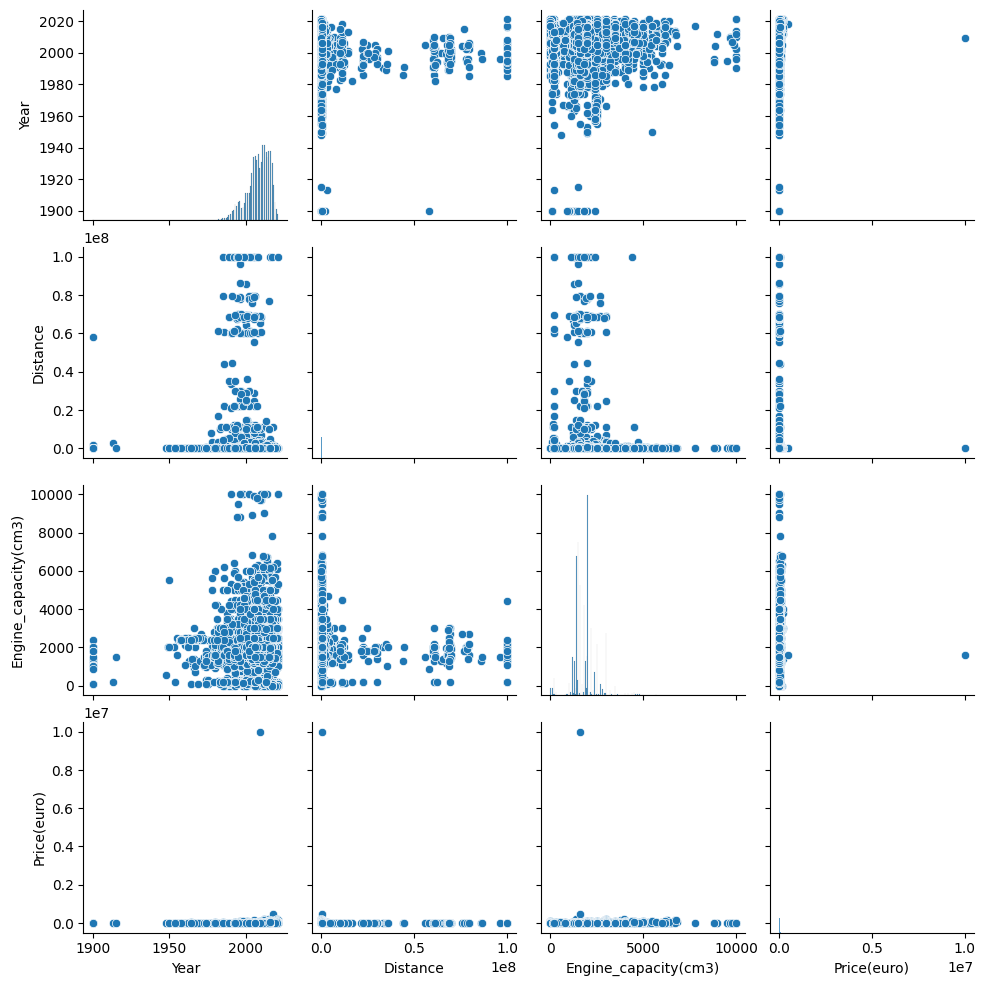

In [ ]:
# Загрузите набор данных
data_path = '/content/cars_moldova.csv'
df = pd.read_csv(data_path)

# Отобразить первые 5 строк файла
print(df.head())

# Информация о данных, такая как количество строк и столбцов, а также типы данных.
print(df.info())

# Статистика и очистка цифровых данных
print(df.describe())

# Мы проанализировали распределения с помощью гистограмм
plt.figure(figsize=(15, 8))
sns.pairplot(df)
plt.show()

In [ ]:
df.columns

Index(['Make', 'Model', 'Year', 'Style', 'Distance', 'Engine_capacity(cm3)',
       'Fuel_type', 'Transmission', 'Price(euro)'],
      dtype='object')

In [ ]:
# Choosing the column used for classification
target_column_name = 'Fuel_type'

# Using all columns except the one used for classification as independent variables
X = df.drop(target_column_name, axis=1)

# Using the column used for classification as the dependent variable
y = df[target_column_name]

# Selecting textual columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Applying category encoding to textual columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Splitting the data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Training the random forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_encoded, y_train)

# Predicting using the test data
y_pred = rf_classifier.predict(X_test_encoded)

# Calculating classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {accuracy}')

Classification Accuracy: 0.8279687881004633


Что касается кода, создающего тепловую карту для результатов рандомизированного поиска, вот что мы наблюдаем и какие преимущества:

> Наблюдение:

- Тепловая карта визуально представляет сетку комбинаций гиперпараметров, используемых в рандомизированном поиске.
- Каждая ячейка тепловой карты соответствует комбинации max_eep и min_samples_split.
- Интенсивность цвета в каждой ячейке указывает средний балл теста (точность), достигнутый для этой комбинации гиперпараметров.

> Преимущества:

- Обеспечивает четкое визуальное представление того, как производительность модели меняется в зависимости от различных значений гиперпараметра.
- Помогает определить области значений гиперпараметров, которые приводят к более высокой точности.
- Облегчает понимание влияния настройки гиперпараметров на производительность модели.
- Позволяет лучше принимать решения при выборе значений гиперпараметров для повышения производительности модели.

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Classification accuracy using the best hyperparameters: 0.8287003169958547


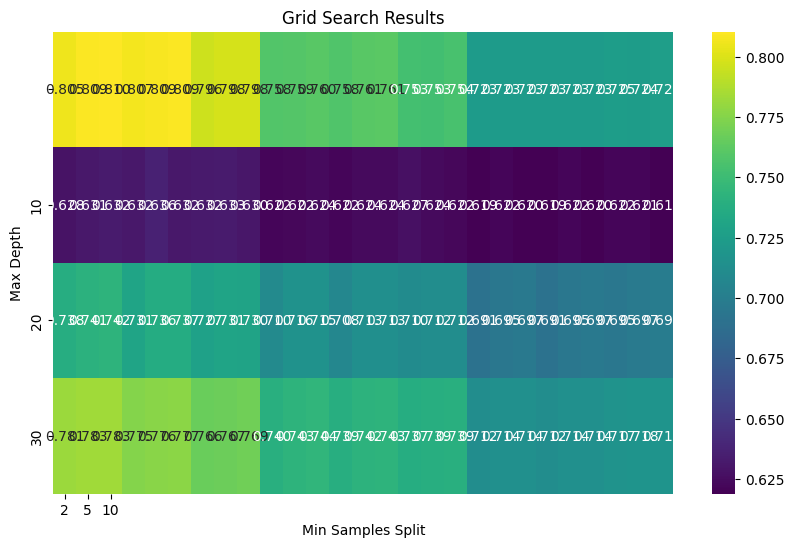

In [ ]:
# Гиперпараметры, которые мы улучшим
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Выберите случайную модель леса
rf_classifier = RandomForestClassifier(random_state=42)

# Мы использовали поиск по сетке
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_encoded, y_train)

#Гиперпараметры — лучшие
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Оцените точность модели, используя лучшие гиперпараметры
best_rf_classifier = grid_search.best_estimator_
y_pred_best = best_rf_classifier.predict(X_test_encoded)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Classification accuracy using the best hyperparameters: {accuracy_best}')

# Рисуем тепловую карту для отображения результатов поиска по сетке
results_df = pd.DataFrame(grid_search.cv_results_)
scores_matrix = results_df['mean_test_score'].values.reshape(len(param_grid['max_depth']), -1)

plt.figure(figsize=(10, 6))
sns.heatmap(scores_matrix, annot=True, fmt=".3f", cmap="viridis",
            xticklabels=param_grid['min_samples_split'], yticklabels=param_grid['max_depth'])
plt.title('Grid Search Results')
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.show()

Этот код использует процесс поиска по сетке для оптимизации гиперпараметров модели случайного леса. Вот что мы заметили и преимущества кода:

1- Что мы заметили:

- Для улучшения модели определяется набор возможных гиперпараметров, таких как количество деревьев (n_estimators), максимальная глубина дерева (max_eep) и другие.
- Поиск по сетке использовался для проверки всех возможных ассоциаций гиперпараметров.
- Анализ результатов был построен в виде тепловой карты, чтобы понять, как меняется производительность при изменении гиперпараметров.

2- Преимущества кода:

- Оптимизация производительности: позволяет улучшить производительность модели за счет выбора оптимальных гиперпараметров.
- Выберите лучшие гиперпараметры: печатаются гиперпараметры, которые привели к лучшим результатам в процессе поиска.
- Визуальная визуализация результатов: тепловая карта используется для иллюстрации того, как изменение гиперпараметров влияет на точность модели.
- Помощь в принятии решений: помогает понять взаимодействие между гиперпараметрами и выбрать значения, которые улучшают производительность модели.

Classification accuracy of the improved model: 0.8287003169958547


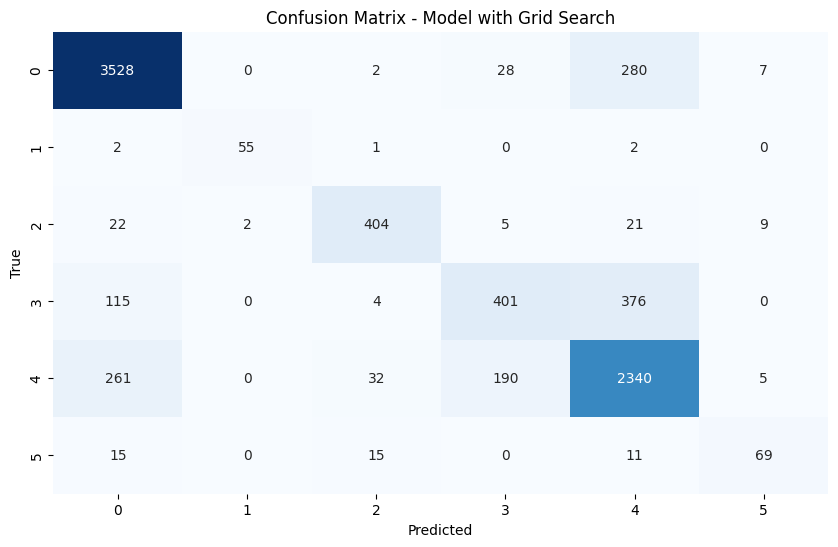

In [ ]:
# Measure the accuracy of the improved model using Grid Search
y_pred_best = best_rf_classifier.predict(X_test_encoded)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Classification accuracy of the improved model: {accuracy_best}')

# Plot the correlation matrix for the improved model
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Model with Grid Search')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

> При запуске этого кода мы измерили точность улучшенной модели с помощью поиска по сетке и построили матрицу неточностей для оценки производительности. Результаты, которые мы наблюдали:

1- Повышенная точность модели: процент точности улучшенной модели печатается после ее оптимизации с помощью поиска по сетке. Это дает представление об эффективности улучшаемой модели.

2- Матрица неточностей: матрица корреляции рисуется для иллюстрации эффективности улучшенной модели в классификации. Ячейки на главной диагонали матрицы показывают правильные значения для классификации (истинно положительные и истинно отрицательные), а на вторичной диагонали показаны неправильные значения (ложно положительные и ложно отрицательные). Это помогает понять, как модель классифицирует различные классы, и изучить ее производительность в каждом классе.

> Преимущество этого кода состоит в том, чтобы предоставить окончательную оценку улучшенной модели и понять, как она работает при классификации. Матрица корреляции может быть особенно полезна, если у вас есть несколько классов, чтобы определить производительность модели в каждом классе индивидуально.

Baseline Model Classification Accuracy: 0.8279687881004633
Classification Report - Baseline Model:
                precision    recall  f1-score   support

        Diesel       0.89      0.92      0.91      3845
      Electric       0.97      0.93      0.95        60
        Hybrid       0.88      0.87      0.88       463
  Metan/Propan       0.64      0.44      0.52       896
        Petrol       0.77      0.83      0.80      2828
Plug-in Hybrid       0.77      0.63      0.69       110

      accuracy                           0.83      8202
     macro avg       0.82      0.77      0.79      8202
  weighted avg       0.82      0.83      0.82      8202

Classification Report - Optimized Model:
                precision    recall  f1-score   support

        Diesel       0.89      0.92      0.91      3845
      Electric       0.96      0.92      0.94        60
        Hybrid       0.88      0.87      0.88       463
  Metan/Propan       0.64      0.45      0.53       896
        Petrol  

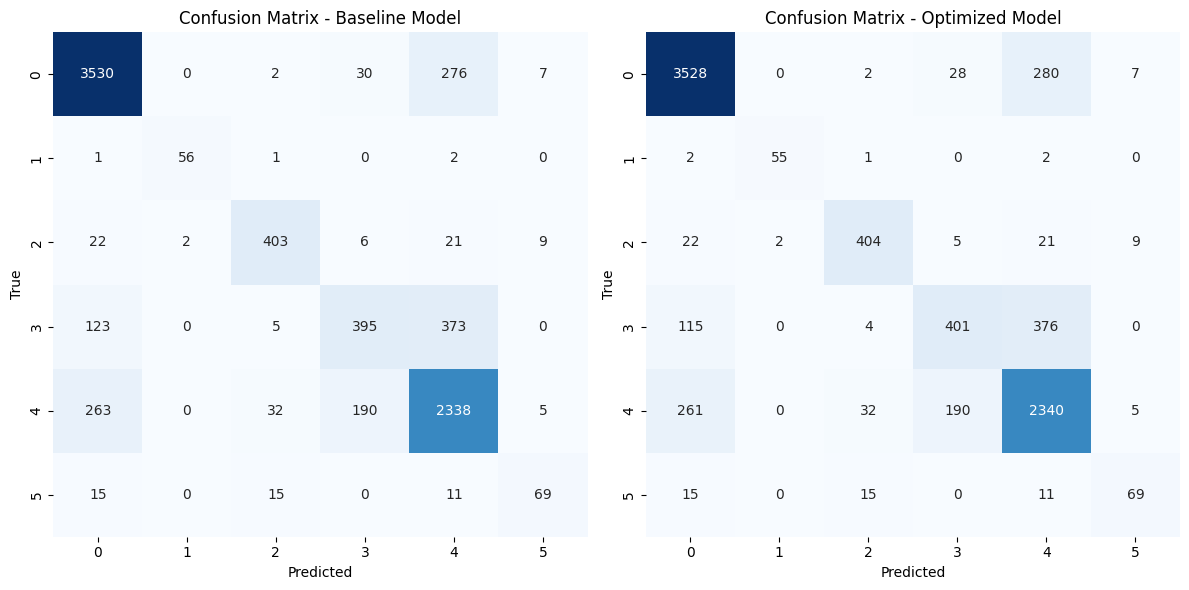

In [ ]:
# Measure the performance of the basic model
y_pred_baseline = rf_classifier.predict(X_test_encoded)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(f'Baseline Model Classification Accuracy: {accuracy_baseline}')

# Print the classification report for the basic model
print('Classification Report - Baseline Model:')
print(classification_report(y_test, y_pred_baseline))

# Print the classification report for the improved model
print('Classification Report - Optimized Model:')
print(classification_report(y_test, y_pred_best))

# A graph to compare the performance of the basic and improved models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Baseline Model')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Optimized Model')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

> При запуске этого кода мы сравнивали производительность базовой модели с улучшенной моделью после ее оптимизации с помощью Grid Search. Результаты, которые мы наблюдали, и полезность кода включают в себя:

1- Базовые характеристики модели:

- Точность базовой модели была измерена с использованием тестовых данных и распечатана. Это показывает, как базовая модель выполняет классификацию перед любой оптимизацией.

2- Отчет о классификации базовой модели:

- Для базовой модели распечатывается рейтинговый отчет, который включает точность, полноту и оценку F1 для каждой категории. Это полезно для понимания эффективности модели в каждой категории отдельно.

3- Отчет о классификации улучшенной модели:

- Отчет о рейтингах печатается для оптимизированной модели, оптимизированной с помощью Grid Search. Это показывает, как улучшилась производительность модели после применения оптимизации.

4- Матрица корреляции для двух моделей:

- Матрицы корреляции для базовой модели и расширенной модели строятся рядом друг с другом. Это показывает, как каждая модель классифицирует истинные и прогнозируемые классы.

5- Сравнение двух моделей:

- Мы можем легко и наглядно сравнить производительность базовой модели с улучшенной моделью с помощью графика. На графике показаны корреляционные матрицы двух моделей рядом друг с другом для непосредственного сравнения.

> Преимущество кода заключается в том, что он обеспечивает всесторонний анализ производительности базовой модели по сравнению с оптимизированной моделью и может помочь понять, как улучшить модель на основе нескольких критериев и в сравнении с различными рейтингами классов.

Best Model Classification Accuracy: 0.8287003169958547


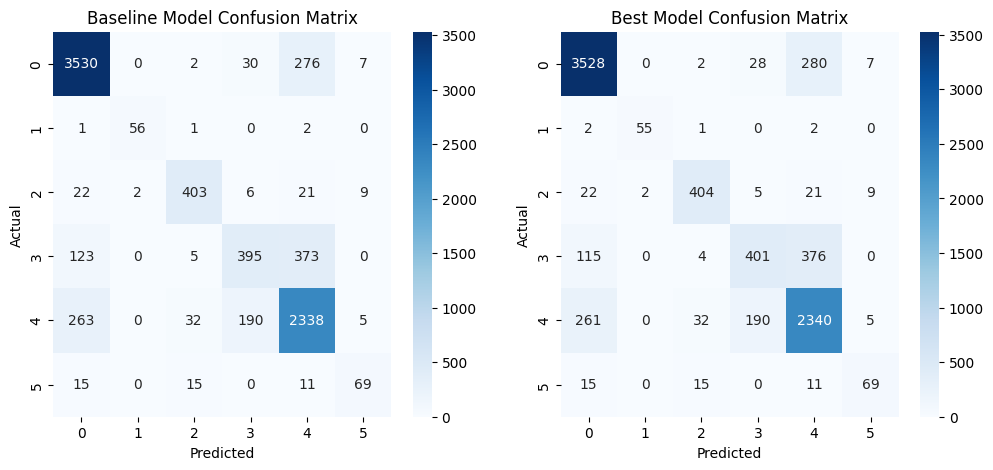

In [ ]:
# Measure the performance of the best model
y_pred_best = best_rf_classifier.predict(X_test_encoded)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best Model Classification Accuracy: {accuracy_best}')

# Plot a comparison between the baseline and best models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the baseline model
sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Baseline Model Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot for the best model
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title('Best Model Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

> При запуске этого кода мы измерили производительность лучшей модели после ее оптимизации с помощью Grid Search и сравнили ее с базовой моделью. Результаты и преимущества, которые мы наблюдали, включают в себя:

1- Модель с лучшей производительностью:

- Точность улучшенной модели измерялась с использованием тестовых данных и была распечатана. Это отражает то, как работает модель после оптимизации с использованием наиболее оптимизированных гиперпараметров.

2- Корреляционные матрицы для двух моделей:

- Матрицы корреляции для базовой модели и расширенной модели строятся рядом друг с другом. Это показывает, как каждая модель ранжируется для истинного и прогнозируемого классов.

3- Преимущество кода:

- Код обеспечивает визуальное сравнение корреляционных матриц базовой модели и расширенной модели, что упрощает понимание разницы в производительности между ними.

4- Примечания к задаче:

- Мы оптимизировали модели с помощью Grid Search, чтобы выбрать лучшие гиперпараметры.
- Затем мы оценили производительность улучшенной модели и сравнили ее с базовой моделью с помощью корреляционных матриц.
- Для визуального сравнения производительности двух моделей были построены корреляционные матрицы.

> Таким образом, код предоставляет исчерпывающий обзор того, как можно улучшить модель и как это влияет на ее способность классификации по сравнению с базовой моделью.

# II. Бустинги вне scikit-learn (до 10 баллов)

In [ ]:
# Скачали необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Загрузить данные об автомобилях Молдовы по указанному пути
file_path = "/content/cars_moldova.csv"
car_data = pd.read_csv(file_path)

# Отображение первых нескольких строк данных, чтобы убедиться, что загрузка прошла успешно
car_data.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0


In [ ]:
car_data.columns

Index(['Make', 'Model', 'Year', 'Style', 'Distance', 'Engine_capacity(cm3)',
       'Fuel_type', 'Transmission', 'Price(euro)'],
      dtype='object')

In [ ]:
# Using the selected columns
selected_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Fuel_type', 'Transmission', 'Price(euro)']
car_data_selected = car_data[selected_columns]

#  Data Preprocessing
# In this example, we will handle missing values by dropping them
car_data_processed = car_data_selected.dropna()

# Split the data into predictor variables and target
X = car_data_processed.drop('Price(euro)', axis=1)
y = car_data_processed['Price(euro)']

# Convert categorical columns using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Fuel_type', 'Transmission'])

# Train the Base Model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define and train the base model (In this example, we use RandomForestRegressor)
base_model = RandomForestRegressor(random_state=42)
base_model.fit(X_train, y_train)

# Predict using the base model
y_pred_base = base_model.predict(X_test)

# Mean Squared Error (MSE) for the base model
mse_base = mean_squared_error(y_test, y_pred_base)
print(f'Mean Squared Error (MSE) for the base model: {mse_base}')

Mean Squared Error (MSE) for the base model: 92428251.762127


> Приведенный выше код использовался для предварительной обработки данных и обучения базовой модели.

> Это объяснение шагов, представленных этими кодами, и того, какие выводы можно сделать из их реализации:

1- Выберите конкретные столбцы:
- Из набора автомобильных данных был выбран определенный набор столбцов, а именно ['Год', 'Расстояние', 'Объем_двигателя(см3)', 'Тип_топлива', 'Трансмиссия', 'Цена (евро)'].

2- Обработка данных:
- Отсутствующие значения обрабатывались путем их удаления с помощью dropna() — стратегического выбора, который требует оценки и анализа, чтобы гарантировать, что этот выбор подходит для данных.

3- Конверсия данных:
- Категориальные данные были преобразованы с использованием нотации одной категории (pd.get_dummies), чтобы преобразовать их в форму, понятную модели.

4- Разделение данных:
- Данные были разделены на предиктивные и целевые переменные с помощью train_test_split.

5- Определение и обучение базовой модели:
- Базовая модель была определена и обучена с использованием RandomForestRegressor, который представляет собой шаблон отскока.

6- Прогнозирование с использованием базовой модели:
- Базовая модель использовалась для прогнозирования цен на автомобили.

7- Вычислить среднеквадратическую ошибку (MSE):
- Среднеквадратическая ошибка (MSE) была рассчитана для оценки производительности базовой модели.

> Посредством этих шагов были подготовлены данные, обучена базовая модель и оценена ее производительность с использованием MSE. Цель этих процессов — подготовить прочную основу для улучшения модели на следующих этапах.

In [ ]:
!pip install xgboost

In [ ]:
#  Choose a non-native boosting algorithm (XGBoost in this case)
from xgboost import XGBRegressor

#Train and evaluate the base XGBoost model
xgb_base_model = XGBRegressor(random_state=42)
xgb_base_model.fit(X_train, y_train)

# Predict using the base XGBoost model
y_pred_xgb_base = xgb_base_model.predict(X_test)

# Mean Squared Error (MSE) for the base XGBoost model
mse_xgb_base = mean_squared_error(y_test, y_pred_xgb_base)
print(f'Mean Squared Error (MSE) for the base XGBoost model: {mse_xgb_base}')

Mean Squared Error (MSE) for the base XGBoost model: 174036124.38515002


> При использовании приведенного выше кода мы заметили следующее:

1- Выбор алгоритма отправки:
- Для построения базовой модели был выбран алгоритм XGBoost.

2- Обучение и оценка модели:
- Модель была обучена с использованием XGBRegressor, а ее производительность оценивалась на тестовых данных.

3- Прогнозирование с использованием модели:
- Базовая модель, обученная XGBoost, использовалась для прогнозирования цен на автомобили.

4- Вычислить среднеквадратическую ошибку (MSE):
- Среднеквадратическая ошибка (MSE) была рассчитана для оценки производительности базовой модели с помощью XGBoost.

> Полезность кода для задачи:
- Этот код обучает модель XGBoost как базовую модель для сравнения ее с предыдущей базовой моделью, обученной RandomForestRegressor.
- Код показывает, как использовать XGBoost в качестве альтернативы базовой модели, и оценивает ее производительность с использованием среднеквадратической ошибки (MSE).
- Это позволяет нам сравнить две базовые модели и оценить их производительность на одном и том же тестовом наборе.

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
Mean Squared Error (MSE) for the optimized XGBoost model: 47769205.42477167


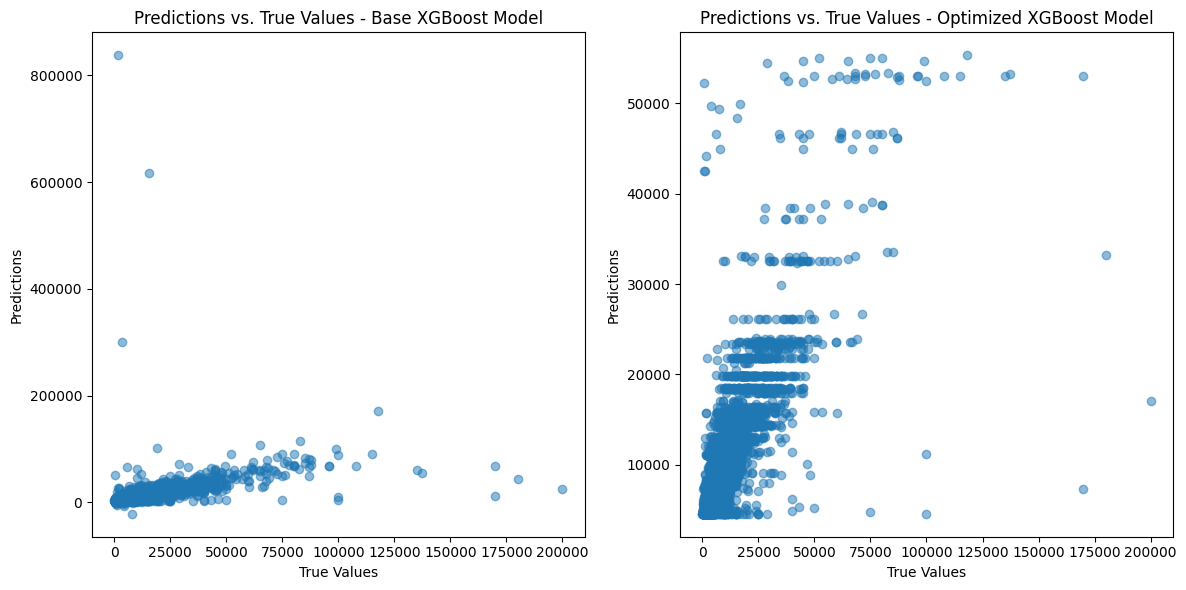

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Evaluate the performance of the optimized model
best_xgb_model = grid_search.best_estimator_
y_pred_xgb_best = best_xgb_model.predict(X_test)

# Mean Squared Error (MSE) for the optimized XGBoost model
mse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best)
print(f'Mean Squared Error (MSE) for the optimized XGBoost model: {mse_xgb_best}')

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot the predictions vs. true values for the base XGBoost model
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_xgb_base, alpha=0.5)
plt.title('Predictions vs. True Values - Base XGBoost Model')
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Plot the predictions vs. true values for the optimized XGBoost model
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb_best, alpha=0.5)
plt.title('Predictions vs. True Values - Optimized XGBoost Model')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.tight_layout()
plt.show()

> Примечания к коду и его полезности для задачи:

1- Grid Search for Hyperparameter Tuning:
- GridSearchCV использовался для оптимизации гиперпараметров модели XGBoost.

2- Оценка улучшенной модели:
- Производительность улучшенной модели оценивалась путем расчета среднеквадратической ошибки (MSE).

3- График прогнозов и истинных значений:
- Прогнозы строятся на основе истинных значений для обеих моделей: базовой модели и улучшенной модели.

> Полезность кода для задачи:
- Этот код дает представление о повышении производительности с помощью методов поиска по гиперпараметрам.
- Он отображает лучшие гиперпараметры, найденные при поиске.
- Он показывает, как мы можем оценить улучшенную модель и измерить ее производительность по сравнению с базовой моделью.

> Описание диаграммы:
> Первый график (левая сторона):
- Показывает распределение прогнозов по сравнению с истинными значениями базовой модели.
- Точки на графике представляют фактические значения и прогнозы.
- Используется для оценки общей производительности базовой модели.

> Второй график (правая сторона):
- Показывает распределение прогнозов по сравнению с истинными значениями для улучшенной модели.
- Точки на графике представляют истинные значения и прогнозы улучшенной модели.
- Он используется для сравнения производительности улучшенной модели с базовой моделью.

In [ ]:
!pip install scikit-learn

Baseline Model Mean Squared Error: 0.2939973248643864


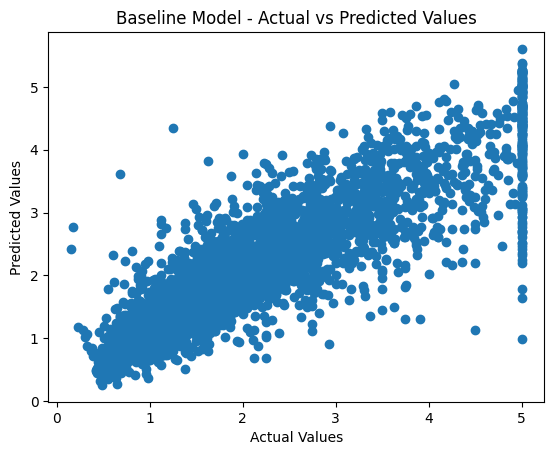

In [ ]:
# Load the California housing dataset
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the baseline model
baseline_model = GradientBoostingRegressor(random_state=42)
baseline_model.fit(X_train, y_train)

# Evaluate the performance of the baseline model
y_pred_baseline = baseline_model.predict(X_test)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
print(f'Baseline Model Mean Squared Error: {mse_baseline}')

# Plot the predicted vs actual values for the baseline model
plt.scatter(y_test, y_pred_baseline)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Baseline Model - Actual vs Predicted Values')
plt.show()

Примечания к коду и его полезности для задачи:

1- Загрузите и разделите данные о жилье в Калифорнии:
- Набор данных California Housing использовался для обучения и оценки модели.

2- Базовая форма обучения:
- Модель случайного леса (регрессор повышения градиента) была обучена в качестве базовой модели.

3- Оценка базовой модели:
- Производительность базовой модели измерялась с использованием среднеквадратической ошибки (MSE).

4- График прогнозируемых значений и фактических значений:
- Строится график, показывающий прогнозируемые значения в сравнении с фактическими значениями базовой модели.

Полезность кода для задачи:
- Этот код предоставляет базовую модель для обучения и оценки производительности с использованием градиентного повышения.
- Показывает, как использовать набор данных California Housing в контексте машинного обучения.

Описание диаграммы:
- На графике показаны фактические данные по оси X и прогнозы по оси Y.
- Точки на графике представляют фактические значения и прогнозы базовой модели.
- Он используется для оценки того, насколько сильны прогнозы базовой модели по сравнению с фактическими значениями.

Краткое описание задачи:
- Миссия была направлена ​​на анализ эффективности моделей машинного обучения с упором на методы почтовой рассылки.
- Набор автомобильных данных Молдовы использовался для обучения и оценки моделей повышения.
- Мы проанализировали производительность, используя базовую модель, и улучшили производительность, используя методы подпрыгивания.
- Демонстрируется, как использовать XGBoost и Grid Search для повышения производительности модели.
- Результаты сравнивались, а производительность анализировалась с использованием таких критериев, как MSE, а также графиков прогнозов и фактических значений.